In [286]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

# Load Model    

In [287]:
# Load the model
model = keras.models.load_model('../fitmotion_model.keras')

c:\ProgramData\miniconda3\envs\tf_testing\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Loading The Data

In [288]:
labels = ['dws', 'jog', 'sit', 'std', 'ups', 'wlk']

In [289]:
# Load Android Data
data_source = 'android_data_cleaned'
data_type = 'std'
data_num = '3'
data_url = '../data/' + data_source + '/' + data_type + '/' + data_type + '_' + data_num + '.csv'

df = pd.read_csv(data_url, sep=',')
df = df.drop(['Unnamed: 0'], axis=1) if 'Unnamed: 0' in df.columns else df
df = df.drop(['id'], axis=1) if 'id' in df.columns else df
df

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Y,User Acceleration Z
0,1.564928,0.672762,0.475846,4.509206,-8.676033,0.750932,0.003670,-0.002243,0.004159,0.012534,0.048959,0.171424
1,1.564928,0.672762,0.475846,4.509206,-8.676033,0.750932,0.003670,-0.002243,0.004159,0.012534,0.048959,0.171424
2,1.564928,0.672762,0.475846,4.502633,-8.676928,0.779499,-0.003554,0.000917,0.001856,0.004542,0.046427,0.148954
3,1.564928,0.672762,0.475846,4.502633,-8.676928,0.779499,-0.003554,0.000917,0.001856,0.004542,0.046427,0.148954
4,1.564928,0.672762,0.475846,4.502633,-8.676928,0.779499,-0.003554,0.000917,0.001856,0.004542,0.046427,0.148954
...,...,...,...,...,...,...,...,...,...,...,...,...
1373,0.983099,0.545619,0.246877,2.912504,-9.302707,1.071158,0.002811,-0.001226,0.001660,-0.006235,0.036818,-0.014608
1374,0.983099,0.545619,0.246877,2.915462,-9.300843,1.079250,0.002220,-0.000834,0.001335,-0.012767,0.042377,-0.015736
1375,0.983099,0.545619,0.246877,2.915462,-9.300843,1.079250,0.002220,-0.000834,0.001335,-0.012767,0.042377,-0.015736
1376,0.983099,0.545619,0.246877,2.915462,-9.300843,1.079250,0.002220,-0.000834,0.001335,-0.012767,0.042377,-0.015736


In [290]:
# Load Orignal Data (for comparison)
data_source_o = 'dataset'
data_type_o = 'wlk_7'
data_num_o = '1'
data_url_o = '../data/' + data_source_o + '/' + data_type_o + '/' + 'sub_' + data_num_o + '.csv'

df_o = pd.read_csv(data_url_o)
df_o = df_o.drop(['Unnamed: 0'], axis=1) if 'Unnamed: 0' in df_o.columns else df_o
df_o

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,-1.711140,-1.429168,-2.591433,-0.139767,0.989987,0.019745,-0.350593,-0.511691,-0.865217,0.091702,0.415881,0.093689
1,-1.787917,-1.414171,-2.630956,-0.152324,0.987759,0.033602,-0.550553,-2.243217,-0.582409,0.367412,0.004566,-0.106082
2,-1.897323,-1.399331,-2.706668,-0.161610,0.985336,0.054729,-0.931014,-1.358033,-0.503947,0.172093,-0.217483,-0.163387
3,-2.018375,-1.383279,-2.813421,-0.168058,0.982470,0.080680,-1.304668,-0.541368,-0.346302,0.004957,-0.237566,-0.019080
4,-2.124395,-1.364054,-2.913092,-0.174613,0.978705,0.107922,-1.278349,-0.434722,-0.398598,-0.040292,-0.241461,0.015201
...,...,...,...,...,...,...,...,...,...,...,...,...
5434,2.740007,-0.813391,2.707558,0.268549,0.726621,0.632380,-4.759731,3.035508,-1.614411,-0.690515,0.160006,-0.301676
5435,2.855015,-0.747426,2.792285,0.207323,0.679753,0.703529,-3.553162,2.566744,-1.584018,-0.628969,0.368785,-0.986305
5436,2.934443,-0.706561,2.835642,0.156434,0.649222,0.744338,-1.892946,2.297347,-0.922597,-0.323685,0.392786,-0.913802
5437,2.977191,-0.671725,2.868442,0.128106,0.622337,0.772195,-1.976241,0.373779,-0.930328,-0.129754,0.223900,-0.717584


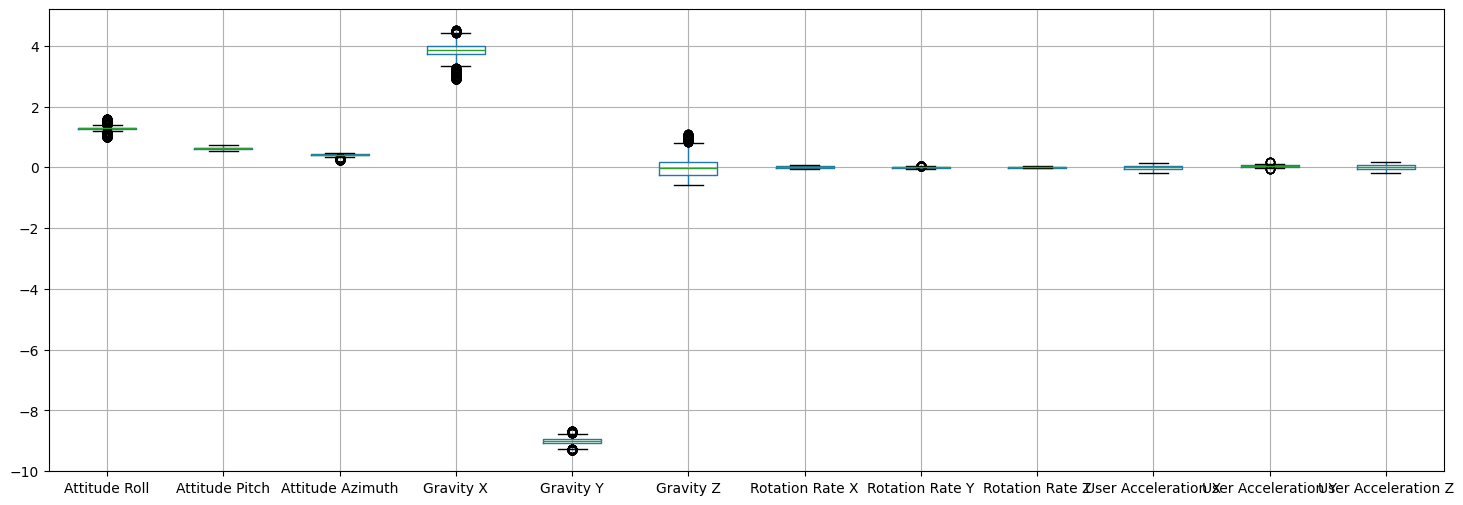

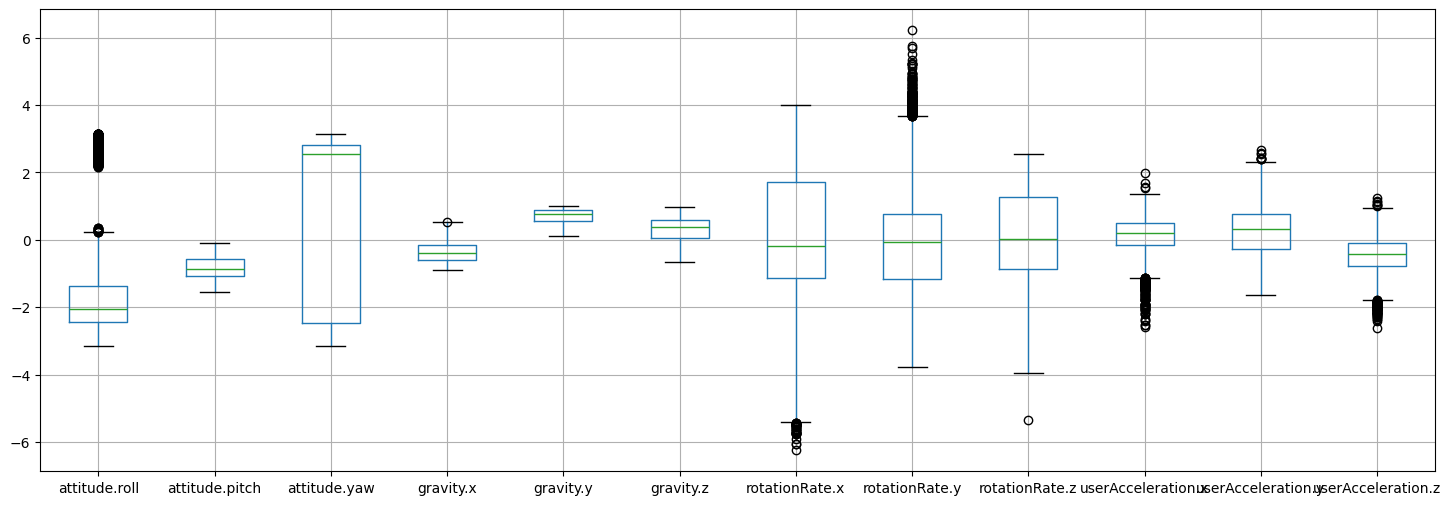

In [291]:
# boxplot
plt.figure(figsize=(18, 6)) 
df.boxplot()
plt.show()

# boxplot
plt.figure(figsize=(18, 6))
df_o.boxplot()
plt.show()

In [292]:
# opening scaling factor file to read the dictionary
with open('../constants.txt', 'r') as f:
    lines = f.readlines()
    scaling_factors = eval(lines[0])

scaling_factors

{'Attitude Roll': 0.1142376591444776,
 'Attitude Pitch': 6.743238035682087,
 'Attitude Azimuth': -0.41661325633781365,
 'Gravity X': -0.40567461707781854,
 'Gravity Y': -0.09295193616982254,
 'Gravity Z': -0.10113856668202935,
 'Rotation Rate X': -1.4943574681964766,
 'Rotation Rate Y': -1.2789613806297648,
 'Rotation Rate Z': -1.6287858288885937,
 'User Acceleration X': -0.0263404192567685,
 'User Acceleration Y': 0.11506888215007838,
 'User Acceleration Z': 0.14220148004175853}

In [293]:
# Multiply data with constants
for i in range(len(df.columns)):
    df.iloc[:, i] = df.iloc[:, i] * scaling_factors[df.columns[i]]

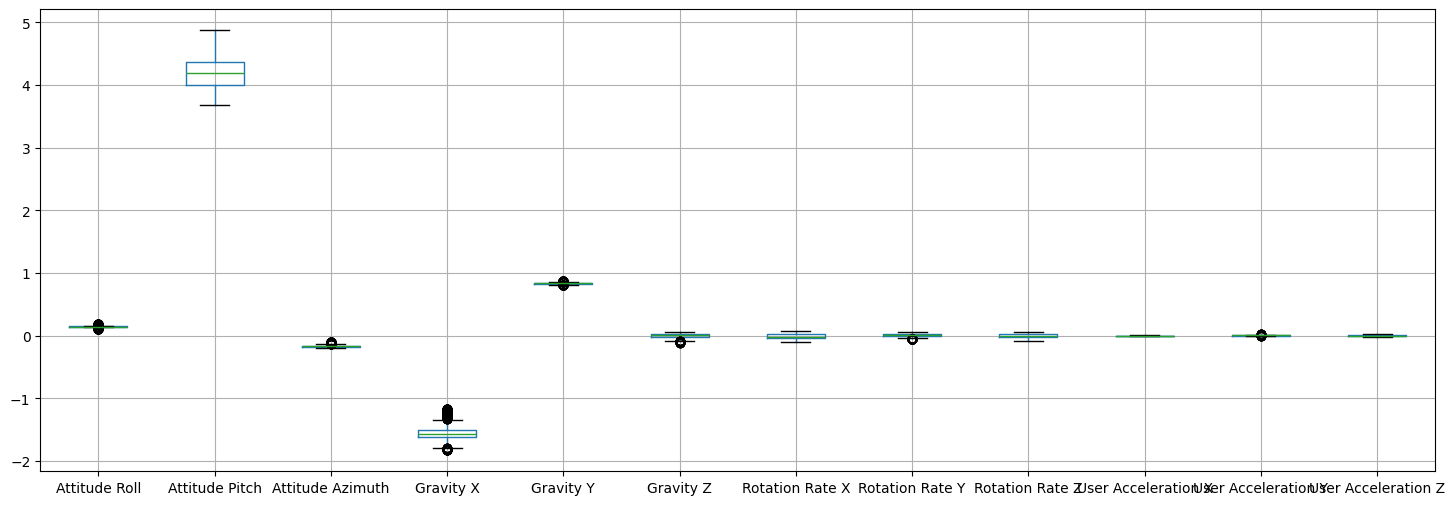

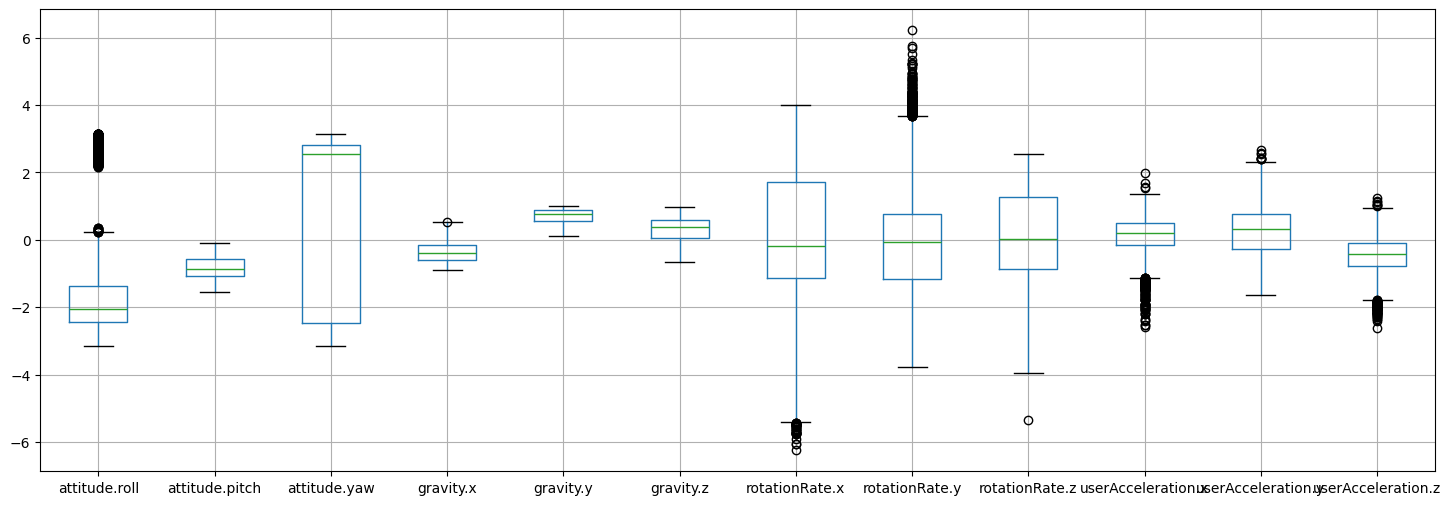

In [294]:
# boxplot
plt.figure(figsize=(18, 6)) 
df.boxplot()
plt.show()

# boxplot
plt.figure(figsize=(18, 6))
df_o.boxplot()
plt.show()

In [295]:
df.head(    )

,Attitude Roll,Attitude Pitch,Attitude Azimuth,Gravity X,Gravity Y,Gravity Z,Rotation Rate X,Rotation Rate Y,Rotation Rate Z,User Acceleration X,User Acceleration Y,User Acceleration Z
0,0.178774,4.536592,-0.198244,-1.829270,0.806454,-0.075948,-0.005484,0.002869,-0.006775,-0.00033,0.005634,0.024377
1,0.178774,4.536592,-0.198244,-1.829270,0.806454,-0.075948,-0.005484,0.002869,-0.006775,-0.00033,0.005634,0.024377
2,0.178774,4.536592,-0.198244,-1.826604,0.806537,-0.078837,0.005310,-0.001172,-0.003022,-0.00012,0.005342,0.021182
3,0.178774,4.536592,-0.198244,-1.826604,0.806537,-0.078837,0.005310,-0.001172,-0.003022,-0.00012,0.005342,0.021182
4,0.178774,4.536592,-0.198244,-1.826604,0.806537,-0.078837,0.005310,-0.001172,-0.003022,-0.00012,0.005342,0.021182


In [296]:
df_o.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,-1.711140,-1.429168,-2.591433,-0.139767,0.989987,0.019745,-0.350593,-0.511691,-0.865217,0.091702,0.415881,0.093689
1,-1.787917,-1.414171,-2.630956,-0.152324,0.987759,0.033602,-0.550553,-2.243217,-0.582409,0.367412,0.004566,-0.106082
2,-1.897323,-1.399331,-2.706668,-0.161610,0.985336,0.054729,-0.931014,-1.358033,-0.503947,0.172093,-0.217483,-0.163387
3,-2.018375,-1.383279,-2.813421,-0.168058,0.982470,0.080680,-1.304668,-0.541368,-0.346302,0.004957,-0.237566,-0.019080
4,-2.124395,-1.364054,-2.913092,-0.174613,0.978705,0.107922,-1.278349,-0.434722,-0.398598,-0.040292,-0.241461,0.015201


# Preprocessing Data

In [297]:
# Prepare the data
WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

In [298]:
from scipy.stats import mode

def sequence_generator(x, length, stride):
    seq_x = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        seq_x.append(input_sequence)
    return np.array(seq_x)

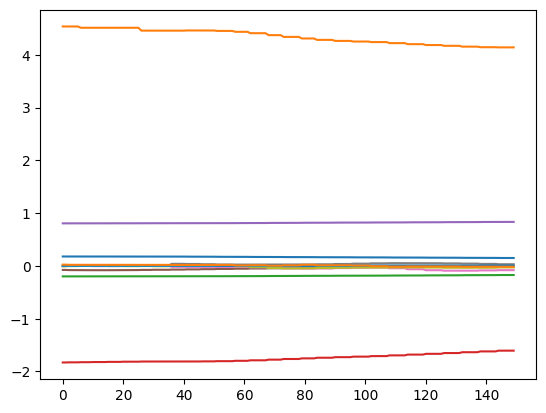

In [299]:
# Checking data
import matplotlib.pyplot as plt

tx = sequence_generator(df, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(tx[0])
plt.show()

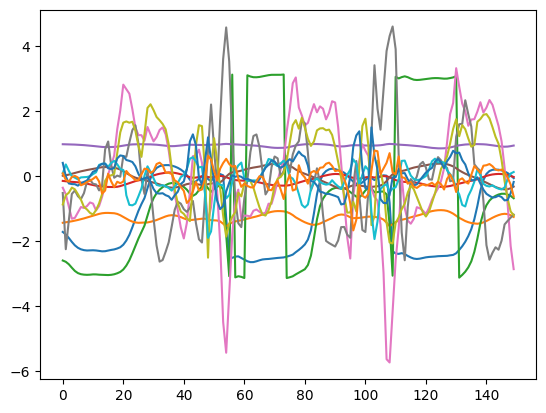

In [300]:
txc = sequence_generator(df_o, WINDOW_LENGTH, STRIDE_LENGTH)
plt.plot(txc[0])
plt.show()

# Prediction

In [301]:
# Predict the data
y_pred = model.predict(tx)

# Get the most frequent label
y_pred = np.argmax(y_pred, axis=1)
y_pred = mode(y_pred)[0]
labels[y_pred]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'std'